###Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [96]:
dataset_train= pd.read_csv('/content/drive/MyDrive/4-1_Semester/practice code/Sentiment Analysis/IMDB_train.csv')
dataset_train.head()

,review,sentiment
0,With the MASSIVE advertising this is getting o...,negative
1,Maybe James P. Lay knows what do to in the sou...,negative
2,If you like the excitement of a good submarine...,positive
3,"""GEORGE LOPEZ,"" in my opinion, is an absolute ...",positive
4,This movie is a great. The plot is very true t...,positive


In [97]:
dataset_test= pd.read_csv('/content/drive/MyDrive/4-1_Semester/practice code/Sentiment Analysis/IMDB_test.csv')
dataset_test.head()

,review,sentiment
0,Recently I borrowed a copy of this mess of a m...,negative
1,Hammer House of Horror: Witching Time is set i...,positive
2,I borrowed (slightly modified) title from some...,positive
3,This is a surprisingly great low budget Horror...,positive
4,Leos Carax is brilliant and is one of the best...,positive


In [98]:
dataset_train.sentiment = dataset_train.sentiment.apply(lambda x: 0 if x =='negative' else 1)
dataset_train.head()

,review,sentiment
0,With the MASSIVE advertising this is getting o...,0
1,Maybe James P. Lay knows what do to in the sou...,0
2,If you like the excitement of a good submarine...,1
3,"""GEORGE LOPEZ,"" in my opinion, is an absolute ...",1
4,This movie is a great. The plot is very true t...,1


In [99]:
dataset_test.sentiment = dataset_test.sentiment.apply(lambda x: 0 if x =='negative' else 1)
dataset_test.head()

,review,sentiment
0,Recently I borrowed a copy of this mess of a m...,0
1,Hammer House of Horror: Witching Time is set i...,1
2,I borrowed (slightly modified) title from some...,1
3,This is a surprisingly great low budget Horror...,1
4,Leos Carax is brilliant and is one of the best...,1


In [100]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     40000 non-null  object
 1   sentiment  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [101]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


### Data cleaning

In [102]:
import re
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import nltk
from nltk.stem import WordNetLemmatizer

wl = WordNetLemmatizer()
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
TAG_RE = re.compile(r'<[^>]+>')
tag = re.compile('@')

def removeTag(string):
  return tag.sub('', string)
  
def remove_tags(text):
  return TAG_RE.sub('',text)

In [104]:
corpus_train=[]

for i in range(0, 40000):
  review = remove_tags(dataset_train['review'][i])
  review = removeTag(dataset_train['review'][i])
  review = re.sub('[^a-zA-Z]', ' ', dataset_train['review'][i])
  review = review.lower()
  review = review.split()
  review = [wl.lemmatize(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus_train.append(review)

In [105]:
corpus_test=[]
for i in range(0, 10000):
  review = remove_tags(dataset_test['review'][i])
  review = removeTag(dataset_test['review'][i])
  review = re.sub('[^a-zA-Z]', ' ', dataset_test['review'][i])
  review = review.lower()
  review = review.split()
  review = [wl.lemmatize(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus_test.append(review)

In [106]:
corpus_train[:2]

['massive advertising getting nickelodeon nick jr ilk son bugging u see dvd theater seen pretty much everything outstanding incredibles shrek really bad wall e brother bear easily worst movie ever seen kid kid stupid thing going end kind experience ok aimed toddler better insulting intelligence anyone never seen something predictable repetitive slow moving finally fed relieved movie bizarre thing end think setup joke one serious though hard tell trying accomplish effect yeah never seen viewmaster big deal otherwise look screen without glass appears process even son bored end wife looked said wow end bad every respect',
 'maybe james p lay know sound department director supervises br br dreamland however cannot accomplish anything writer director br br absolutely nothing film story character building event atmosphere plot twist acting deserves name br br department movie billion light year behind short film actual thinking even one minute one br br nothing david lynch work br br actuall

In [107]:
corpus_test[:2]

['recently borrowed copy mess movie took three session three day get another comment making br br wanted comment first carelessness special feature dvd included game memory asks player viewer match pair animal order board ark however every time reveals chosen animal screen prompt player find congratulates player finding mate spelling error since mate possessive pronoun not contraction annoying error keep repeating time finish game course kid activity really teach kid incorrect spelling br br oh yeah game never change game location animal time plus keep score like number move took solve game lasting value challenge feature list packaging br br simply put could thought care put special feature like could thought care put muddled film',
 'hammer house horror witching time set rural england woodstock farm stressed musician david winter jon finch life actress wife mary prunella gee currently composing music horror film one night looking dog billy david find mysterious woman barn calling luc

### Data transformation

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [109]:
X_tr = cv.fit_transform(corpus_train).toarray()
y_tr = dataset_train.iloc[:, -1].values
y_tr=y_tr.astype('int')

In [110]:
X_te = cv.fit_transform(corpus_test).toarray()
y_te = dataset_test.iloc[:, -1].values
y_te=y_te.astype('int')

In [18]:
# # Saving BoW dictionary to later use in prediction
# import pickle
# bow_path = './drive/MyDrive/Project2_Sentiment_Analysis/c1_BoW_Sentiment_Model.pkl'
# pickle.dump(cv, open(bow_path, "wb"))

### Dividing dataset into training and test set

In [111]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
# dataset.sentiment.unique()

# X_train = dataset_train.review[ : ]
# y_train = dataset_train.sentiment[ : ]

# X_test = dataset_test.review[ : ]
# y_test = dataset_test.sentiment[:]

X_train = X_tr
y_train = y_tr

X_test = X_te
y_test = y_te

In [112]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 1420) (40000,)
(10000, 1420) (10000,)


### Model fitting (Naive Bayes)

In [113]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [22]:
# # Exporting NB Classifier to later use in prediction
# import joblib
# joblib.dump(classifier, './drive/MyDrive/Project2_Sentiment_Analysis/c2_Classifier_Sentiment_Model') 

###Model performance

In [114]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[2426 2618]
 [1677 3279]]


0.5705

In [115]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """

    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Bag of Words')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[2426 2618]
 [1677 3279]]
precision:0.556 
recall:0.662
F1 score: 0.604
AUC: 0.5713
Accuracy: 57.05%


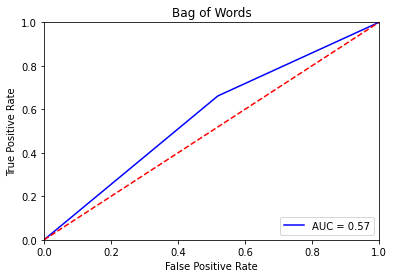

In [116]:
evaluate(y_test, y_pred)

### Logistic Regression

In [26]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3823 1221]
 [2856 2100]]


0.5923

In [28]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """

    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Logistic Regression')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[3823 1221]
 [2856 2100]]
precision:0.632 
recall:0.424
F1 score: 0.507
AUC: 0.5908
Accuracy: 59.23%


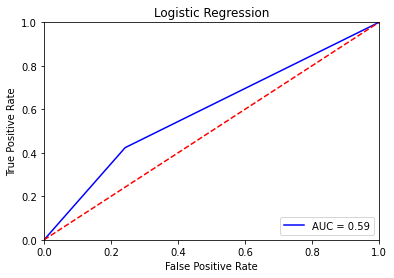

In [29]:
evaluate(y_test, y_pred)

### EXTRA

In [41]:
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# wl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [32]:
# ps.stem('writing')

'write'

In [48]:
# wl.lemmatize('better', pos='a')

'good'

In [93]:
import re
regex = re.compile(r'<[^>]+>')
tag = re.compile('@')
def removeTag(string):
  return tag.sub('', string)

def remove_html(string):
    return regex.sub('', string)
text=input("Enter String:")
new_text=remove_html(text)
new_text = removeTag(new_text)


Enter String:As you can see I've submitted 2 comments about this show since 1991....and no, ITV have still not made it available for general release.<br /><br />HOWEVER, I recently contacted ITV to see if there was any way of getting hold of a copy, and this was their reply.......<br /><br />"Unfortunately there are no plans for this programme to be released on DVD/video. You can however, purchase copies from our Viewers Requests dept. Their email address is: viewers.requests@itv.com ".<br /><br />Hope you all now get the chance to enjoy this classic short comedy again.<br /><br />


In [94]:
print(new_text)

As you can see I've submitted 2 comments about this show since 1991....and no, ITV have still not made it available for general release.HOWEVER, I recently contacted ITV to see if there was any way of getting hold of a copy, and this was their reply......."Unfortunately there are no plans for this programme to be released on DVD/video. You can however, purchase copies from our Viewers Requests dept. Their email address is: viewers.requestsitv.com ".Hope you all now get the chance to enjoy this classic short comedy again.


In [117]:
"br" in new_text

False